In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology
from scipy import ndimage as ndi

In [12]:
def my_pipeline(image_path):
    """
    This function extracts information about nuclei found in the third channel of an image
    loaded at the given path
    
    Parameters
    ----------
    image_path: str
        path to image
        
    Returns
    -------
    my_table: pandas dataframe
        dataframe with label, area, mean_intensity and extent information for each nucleus
    
    """
    
    image_stack = skimage.io.imread(image_path)
    
    image_nuclei = image_stack[:,:,2]#blue channel in RGB
    image_signal = image_stack[:,:,1]#green channel in RGB

    # filter image
    image_nuclei = skimage.filters.median(image_nuclei, skimage.morphology.disk(5))

    # create mask and clean-up
    mask_nuclei = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)
    mask_nuclei = skimage.morphology.binary_closing(mask_nuclei, footprint=skimage.morphology.disk(5))
    mask_nuclei = ndi.binary_fill_holes(mask_nuclei, skimage.morphology.disk(5))
    
    # label image
    my_labels = skimage.morphology.label(mask_nuclei)

    # measure
    my_regions = skimage.measure.regionprops_table(my_labels, image_signal, properties=('label','area', 'mean_intensity'))
    
    plt.subplots(figsize=(10,10))
    plt.imshow(mask_nuclei)
    plt.show()
    
    my_table = pd.DataFrame(my_regions)
    
    return my_table

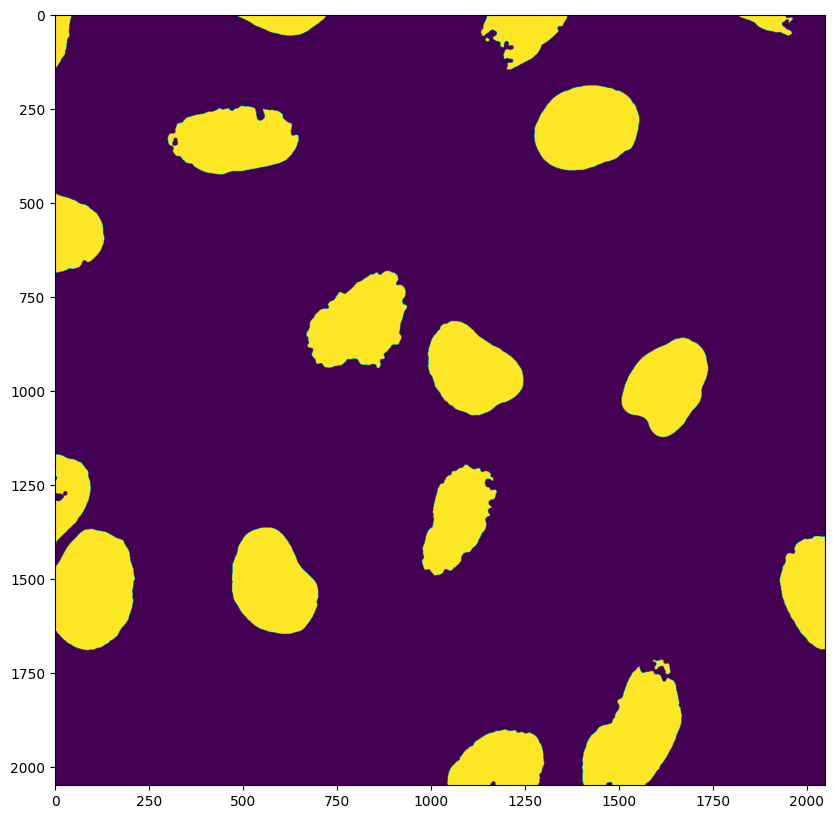

In [13]:
table = my_pipeline('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')

In [14]:
table

,label,area,mean_intensity
0,1,4221.0,79.265103
1,2,8386.0,65.997734
2,3,18258.0,70.261091
3,4,4043.0,63.026713
4,5,73.0,47.438356
5,6,49056.0,53.714510
6,7,45671.0,53.807099
7,8,20537.0,70.453912
8,9,46853.0,66.137729
9,10,43277.0,41.412552


In [15]:
def my_pipeline(image_path, do_plotting=False):
    """
    This function extracts information about nuclei found in the third channel of an image
    loaded at the given path
    
    Parameters
    ----------
    image_path: str
        path to image
    do_plotting: bool
        show segmentation or not
        
    Returns
    -------
    my_table: pandas dataframe
        dataframe with label, area, mean_intensity and extent information for each nucleus
    
    """
    
    image_stack = skimage.io.imread(image_path)
    
    image_nuclei = image_stack[:,:,2]#blue channel in RGB
    image_signal = image_stack[:,:,1]#green channel in RGB

    # filter image
    image_nuclei = skimage.filters.median(image_nuclei, skimage.morphology.disk(5))

    # create mask and clean-up
    mask_nuclei = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)
    mask_nuclei = skimage.morphology.binary_closing(mask_nuclei, skimage.morphology.disk(5))
    mask_nuclei = ndi.binary_fill_holes(mask_nuclei, skimage.morphology.disk(5))
    
    # label image
    my_labels = skimage.morphology.label(mask_nuclei)

    # measure
    my_regions = skimage.measure.regionprops_table(my_labels, image_signal, properties=('label','area', 'mean_intensity'))
    
    if do_plotting:
        plt.subplots(figsize=(10,10))
        plt.imshow(mask_nuclei)
        plt.show()
    
    my_table = pd.DataFrame(my_regions)
    
    return my_table
                
                

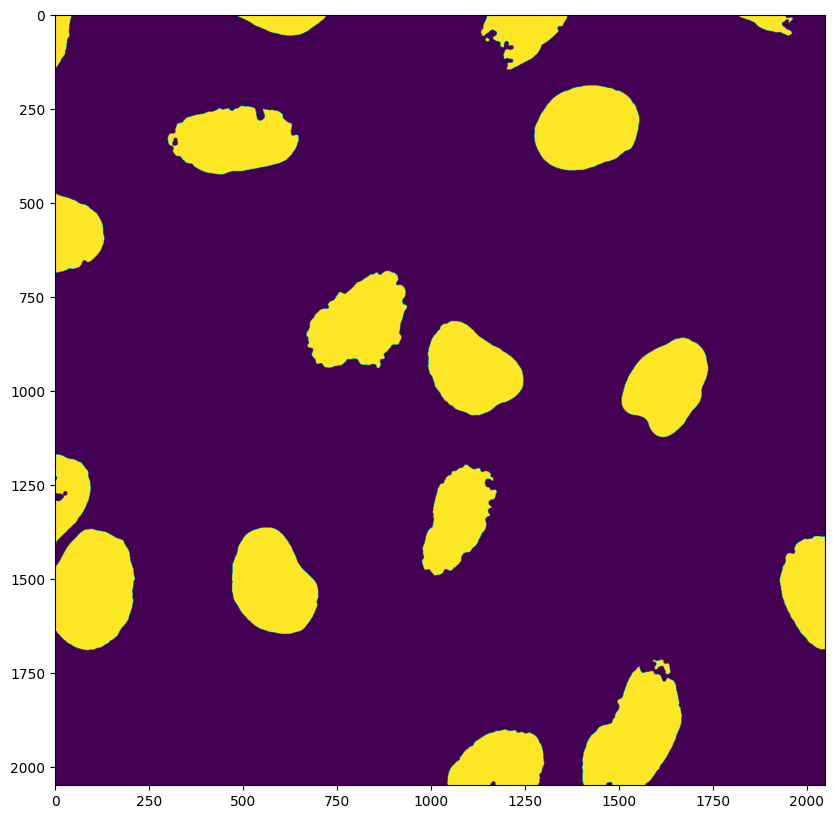

In [21]:
table = my_pipeline('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')
check = my_pipeline('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif', True)

In [17]:
files_to_analyze = [
    'https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif',
    'https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/27897_273_C8_2.tif'
]

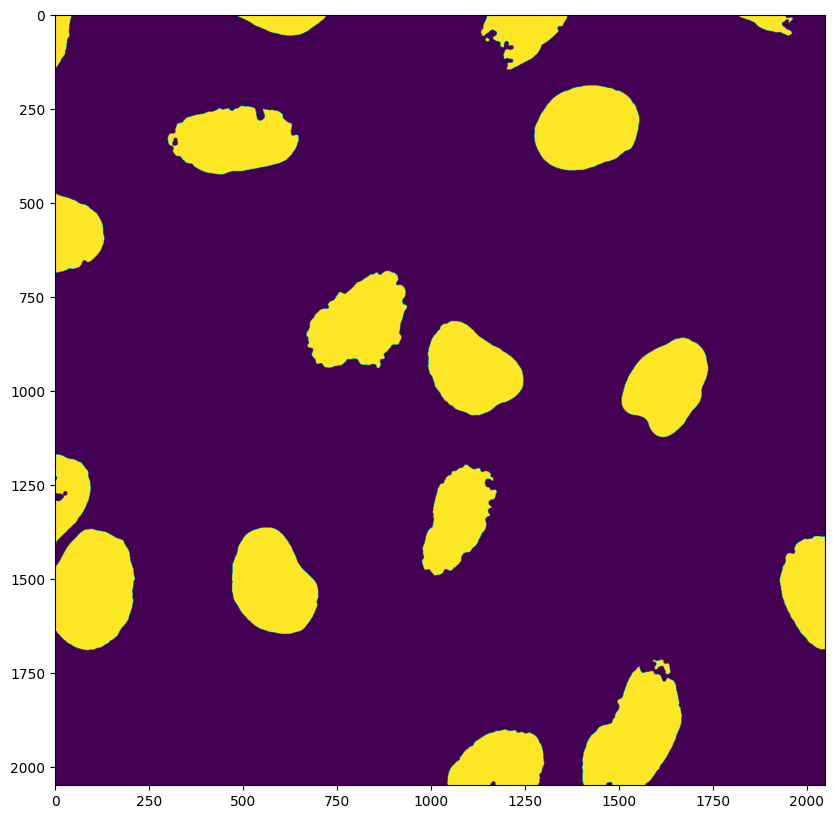

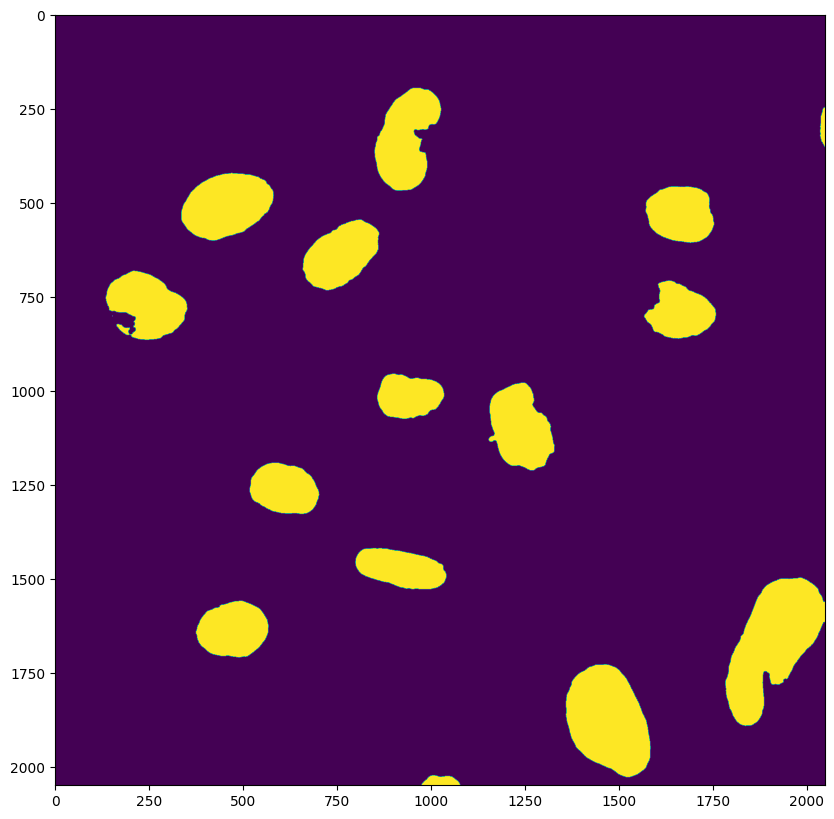

In [18]:
all_tables = []
for file in files_to_analyze:
    
    #use the function
    new_table = my_pipeline(file, True)
    
    #add image index
    new_table['filename'] = file.split('/')[-1]
    
    #append the result to the list
    all_tables.append(new_table)

In [19]:
complete_info = pd.concat(all_tables)
complete_info

,label,area,mean_intensity,filename
0,1,4221.0,79.265103,46658_784_B12_1.tif
1,2,8386.0,65.997734,46658_784_B12_1.tif
2,3,18258.0,70.261091,46658_784_B12_1.tif
3,4,4043.0,63.026713,46658_784_B12_1.tif
4,5,73.0,47.438356,46658_784_B12_1.tif
5,6,49056.0,53.714510,46658_784_B12_1.tif
6,7,45671.0,53.807099,46658_784_B12_1.tif
7,8,20537.0,70.453912,46658_784_B12_1.tif
8,9,46853.0,66.137729,46658_784_B12_1.tif
9,10,43277.0,41.412552,46658_784_B12_1.tif


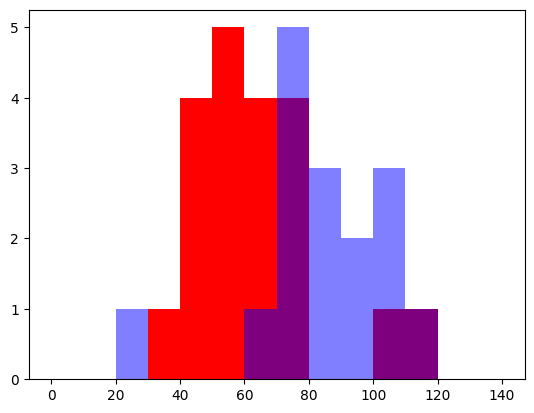

In [20]:
plt.hist(all_tables[0]['mean_intensity'], bins = np.arange(0,150,10), color = 'red')
plt.hist(all_tables[1]['mean_intensity'], bins = np.arange(0,150,10), alpha = 0.5, color = 'blue')
plt.show()